In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

# 전체 컬럼, 전체 행, 전체 숫자 출력
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

# warning message 제거

import warnings
warnings.filterwarnings('ignore')

# plot 출력

%matplotlib inline

# plot 한글출력

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'NanumGothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['NanumGothic']

In [3]:
# 좌석판매율 전체 반영한 데이터
mean_sales_rate = pd.read_csv('../01.Data_Collection/평균좌석판매율.csv')
print(mean_sales_rate.shape)
mean_sales_rate.sample()

(662, 4)


,영화명,F등급,평균좌석판매율,전체배정좌석수
342,올 리브 올리브,2,7.654444,68564.000000


1. 좌석판매율 아웃라이어 삭제 혹은 winsorizing 혹은 100 % 로 맞추기
    - 좌석판매율 분포 확인 screen_final.csv 에서


2. 개봉n일차 그룹별로 끊어서 ols 돌리기(row by row)
    - 그룹별 개봉 몇일차까지 있는지 확인 screen_final.csv 에서


3. ols p 값 작게 만들어서 (8000 row) 다시 캡쳐

# 좌석판매율 아웃라이어 처리
- 최대값 100 % 으로 맞추기 
- 아웃라이어 삭제

In [16]:
screen = pd.read_csv('../01.Data_Collection/screens_final.csv')
print(screen.shape)
screen.sample()

(39749, 20)


,영화코드,영화명,개봉일,점유율집계일,개봉n일차,개봉n일차(int),상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
32592,20181086,군산: 거위를 노래하다,2018-11-08,2019-01-10,63 days 00:00:00.000000000,63,1,0.010000,24,1,0.000000,19,125,0.800000,0.000000,27,4000,126662500,1,15361


In [8]:
screen[screen['좌석판매율'] > 100]['영화명'].value_counts()

사랑의 선물                  5
특종: 량첸살인기               4
미라클 여행기                 4
자백                      3
다시 태어나도 우리              3
탐정 : 더 비기닝              3
사도                      3
사랑하기 때문에                3
오피스                     2
어우동: 주인 없는 꽃            2
폴라로이드                   2
미쓰백                     2
미스 프레지던트                2
임을 위한 행진곡               2
김복동                     2
미쓰 와이프                  2
연평해전                    2
아이 캔 스피크                2
춘희막이                    2
리틀 포레스트                 2
순정                      2
우리들                     2
공범자들                    1
비밥바룰라                   1
극장판 프랭키와 친구들: 생명의 나무    1
그라운드의 이방인               1
타투                      1
더 테이블                   1
그날의 분위기                 1
박열                      1
협녀, 칼의 기억               1
그대 이름은 장미               1
반드시 잡는다                 1
바람 바람 바람                1
공작                      1
치외법권                    1
대립군                     1
레드슈즈                    1
더 폰         

In [12]:
screen[screen['영화명'] == '미라클 여행기'][['좌석판매율', '개봉n일차(int)']]

,좌석판매율,개봉n일차(int)
158,200.000000,-9
161,101.400000,-6
162,101.400000,-5
163,101.400000,-3
164,100.000000,-2
167,3.200000,0
168,2.300000,1
171,7.200000,2
172,3.500000,3
175,4.900000,4


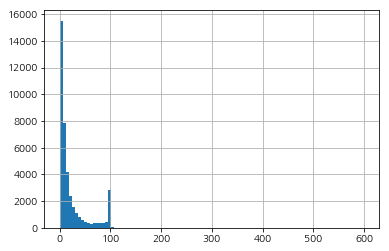

In [14]:
screen['좌석판매율'].hist(bins=100)

In [32]:
screen.columns

Index(['영화코드', '영화명', '개봉일', '점유율집계일', '개봉n일차', '개봉n일차(int)', '상영횟수', '상영점유율',
       '상영점유율순위', '스크린수', '스크린점유율', '스크린점유율순위', '좌석수', '좌석판매율', '좌석점유율',
       '좌석점유율순위', '매출액', '누적매출액', '관객수', '누적관객수'],
      dtype='object')

In [33]:
# 좌석판매율 아웃라이어 모두 100 으로 맞춤
screen_max_100 = screen[['영화명', '개봉n일차(int)', '좌석판매율']]
screen_max_100.loc[screen_max_100['좌석판매율'] > 100, '좌석판매율'] = 100
screen_max_100[screen_max_100['좌석판매율'] > 100]
screen_max_100.shape

(39749, 3)

In [34]:
# 좌석판매율 아웃라이어 제거
screen_drop_outlier = screen[['영화명', '개봉n일차(int)', '좌석판매율']]
screen_drop_outlier = screen_drop_outlier[screen_drop_outlier['좌석판매율'] <= 100]
screen_drop_outlier.shape

(39633, 3)

# 그룹별로 테이블 만들기

In [25]:
g1 = pd.read_csv('../03.ButterKnife/prime_group1.csv')['영화명'].unique()
g2 = pd.read_csv('../03.ButterKnife/prime_group2.csv')['영화명'].unique()
g3 = pd.read_csv('../03.ButterKnife/prime_group3.csv')['영화명'].unique()
g4 = pd.read_csv('../03.ButterKnife/prime_group4.csv')['영화명'].unique()
g5 = pd.read_csv('../03.ButterKnife/prime_group5.csv')['영화명'].unique()
print(len(g1))
print(len(g2))
print(len(g3))
print(len(g4))
print(len(g5))

239
195
154
38
35


In [24]:
film = pd.read_csv('../01.Data_Collection/films_final.csv')
print(film.shape)

(662, 41)


In [58]:
film['F등급'] = film['F-rated']

In [59]:
g1_film = film[film['영화명'].isin(g1)]
g2_film = film[film['영화명'].isin(g2)]
g3_film = film[film['영화명'].isin(g3)]
g4_film = film[film['영화명'].isin(g4)]
g5_film = film[film['영화명'].isin(g5)]
print(g1_film.shape)
print(g2_film.shape)
print(g3_film.shape)
print(g4_film.shape)
print(g5_film.shape)

(239, 42)
(195, 42)
(154, 42)
(38, 42)
(35, 42)


In [60]:
g1_max_100 = g1_film.merge(screen_max_100, how='left', on='영화명')
g2_max_100 = g2_film.merge(screen_max_100, how='left', on='영화명')
g3_max_100 = g3_film.merge(screen_max_100, how='left', on='영화명')
g4_max_100 = g4_film.merge(screen_max_100, how='left', on='영화명')
g5_max_100 = g5_film.merge(screen_max_100, how='left', on='영화명')

In [61]:
g1_drop_outlier = g1_film.merge(screen_drop_outlier, how='left', on='영화명')
g2_drop_outlier = g2_film.merge(screen_drop_outlier, how='left', on='영화명')
g3_drop_outlier = g3_film.merge(screen_drop_outlier, how='left', on='영화명')
g4_drop_outlier = g4_film.merge(screen_drop_outlier, how='left', on='영화명')
g5_drop_outlier = g5_film.merge(screen_drop_outlier, how='left', on='영화명')

## 그룹별로 개봉n일차 기준 잡기
- 일단 그룹별(max) 최솟값으로 자름- 이게 맞는지는 모르겠음
- max 대신 quantile 써서 그룹바이했더니 g4 결과가 -됨

(0, 500)

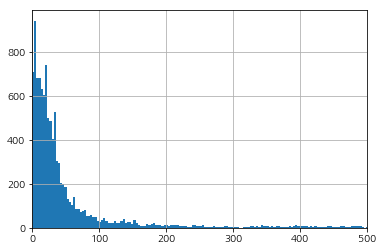

In [43]:
g1_max_100['개봉n일차(int)'].hist(bins=1000)
plt.xlim(0, 500)

In [266]:
data = g1_max_100.groupby('영화명')['개봉n일차(int)'].max().reset_index().sort_values('개봉n일차(int)')
data

,영화명,개봉n일차(int)
88,발광하는 현대사,6
148,악인은 살아 있다,12
115,서태지밴드 콘서트투어 '콰이어트나이트',13
121,세상끝의 사랑,13
147,아일랜드 - 시간을 훔치는 섬,13
163,예스 평창!,13
119,성난 화가,14
110,살인자의 기억법 : 새로운 기억,15
26,기화,16
50,덫: 치명적인 유혹,17


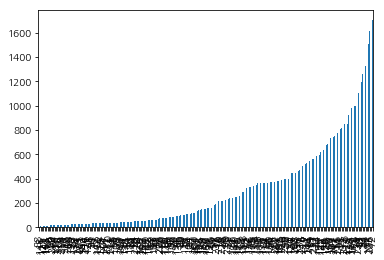

In [47]:
data['개봉n일차(int)'].plot.bar()

g1 최소 6일차까지

In [265]:
data = g2_max_100.groupby('영화명')['개봉n일차(int)'].max().reset_index().sort_values('개봉n일차(int)')
data

,영화명,개봉n일차(int)
162,질투의 역사,9
173,커터,9
194,히야,13
178,태양을 쏴라,13
155,제 7기사단,13
122,어떤살인,14
61,러브 유어셀프 인 서울,15
105,섬. 사라진 사람들,17
12,구세주: 리턴즈,17
181,트릭,18


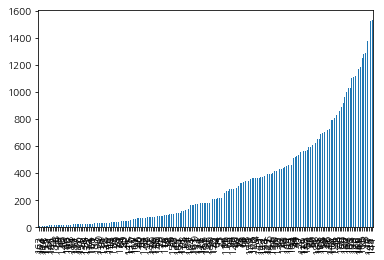

In [50]:
data['개봉n일차(int)'].plot.bar()

g2 최소 9일차까지

In [262]:
data = g3_max_100.groupby('영화명')['개봉n일차(int)'].max().reset_index().sort_values('개봉n일차(int)')
data

,영화명,개봉n일차(int)
74,브링 더 소울 : 더 무비,18
141,함정,20
91,속닥속닥,21
45,데자뷰,21
108,연애의 맛,24
78,비정규직 특수요원,26
114,왓칭,26
97,시간위의 집,27
152,흥부: 글로 세상을 바꾼 자,27
128,진범,27


g3 최소 18일까지

In [263]:
data = g4_max_100.groupby('영화명')['개봉n일차(int)'].max().reset_index().sort_values('개봉n일차(int)')
data

,영화명,개봉n일차(int)
26,유열의 음악앨범,53
15,변신,62
18,사바하,62
12,목격자,78
34,창궐,85
19,살인자의 기억법,87
29,조선명탐정 : 사라진 놉의 딸,88
13,바람 바람 바람,92
3,군함도,114
17,사라진 밤,120


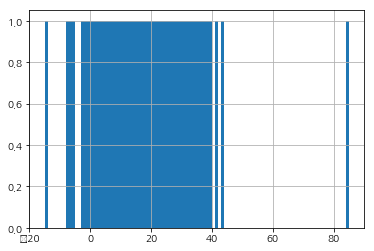

In [188]:
g4_max_100[g4_max_100['영화명'] == '창궐']['개봉n일차(int)'].hist(bins=100)

g4 53일차까지 -> quantile(.975) 적용 43일차까지

In [264]:
data = g5_max_100.groupby('영화명')['개봉n일차(int)'].max().reset_index().sort_values('개봉n일차(int)')
data

,영화명,개봉n일차(int)
9,너의 결혼식,86
18,봉오동 전투,86
27,엑시트,97
23,악인전,112
24,안시성,131
5,국가부도의 날,135
6,기생충,160
7,꾼,175
14,마스터,208
12,돈,227


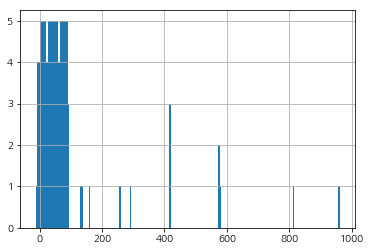

In [158]:
g5_max_100[g5_max_100['영화명'] == '사도']['개봉n일차(int)'].hist(bins=200)
# plt.xlim(0, 200)

g5 86일차까지 ->quantile(.975)적용 43일차까지 

## 그룹별 최소값으로 컷

그룹 | 개봉n일차 최소값
--|--
g1|6
g2|9
g3|18
g4|53
g5|86

In [315]:
# 좌석점유율 최대값 100으로 맞춘 데이터
g1_ols = g1_max_100[(g1_max_100['개봉n일차(int)'] >= 0) & (g1_max_100['개봉n일차(int)'] <= 6)]
g2_ols = g2_max_100[(g2_max_100['개봉n일차(int)'] >= 0) & (g2_max_100['개봉n일차(int)'] <= 9)]
g3_ols = g3_max_100[(g3_max_100['개봉n일차(int)'] >= 0) & (g3_max_100['개봉n일차(int)'] <= 18)]
g4_ols = g4_max_100[(g4_max_100['개봉n일차(int)'] >= 0) & (g4_max_100['개봉n일차(int)'] <= 37)] # 53
g5_ols = g5_max_100[(g5_max_100['개봉n일차(int)'] >= 0) & (g5_max_100['개봉n일차(int)'] <= 43)] # 86

In [270]:
g1_ols.groupby('영화명')['영화코드'].size().reset_index().sort_values('영화코드')

,영화명,영화코드
77,무서운 집,1
149,안나 카레니나,2
10,공포체험단 곤지암편,2
24,기생-꽃의 고백,4
73,맞짱,6
41,눈이라도 내렸으면,6
155,어둔 밤,7
156,어떤이의 꿈,7
157,어른이 되면,7
158,어우동: 주인 없는 꽃,7


In [300]:
# g1_ols[g1_ols['영화명'] == '발광하는 현대사']['개봉n일차(int)'] # 11701 11703
g1_ols = g1_ols.drop([11701, 11703])

In [332]:
data = g1_ols.copy()

data = data.append(g1_ols[g1_ols['영화명'] == '무서운 집'])
data = data.append(g1_ols[g1_ols['영화명'] == '무서운 집'])
data = data.append(g1_ols[g1_ols['영화명'] == '무서운 집'])
data = data.append(g1_ols[g1_ols['영화명'] == '무서운 집'])
data = data.append(g1_ols[g1_ols['영화명'] == '무서운 집'])
data = data.append(g1_ols[g1_ols['영화명'] == '무서운 집'])

data = data.append(g1_ols[g1_ols['영화명'] == '안나 카레니나'])
data = data.append(g1_ols[g1_ols['영화명'] == '안나 카레니나'])
data = data.append(g1_ols[g1_ols['영화명'] == '안나 카레니나'].iloc[0])

data = data.append(g1_ols[g1_ols['영화명'] == '공포체험단 곤지암편'])
data = data.append(g1_ols[g1_ols['영화명'] == '공포체험단 곤지암편'])
data = data.append(g1_ols[g1_ols['영화명'] == '공포체험단 곤지암편'].iloc[0])

data = data.append(g1_ols[g1_ols['영화명'] == '기생-꽃의 고백'][:3])

data = data.append(g1_ols[g1_ols['영화명'] == '맞짱'].iloc[0])

data = data.append(g1_ols[g1_ols['영화명'] == '눈이라도 내렸으면'].iloc[0])

g1_row_count_fixed = data

In [302]:
data.groupby('영화명')['영화코드'].size().reset_index().sort_values('영화코드')

,영화명,영화코드
0,22,7
151,"안녕, 나의 소녀 시절이여",7
152,"안녕, 전우치! 도술로봇대결전",7
153,앨리스: 원더랜드에서 온 소년,7
154,야근 대신 뜨개질,7
155,어둔 밤,7
156,어떤이의 꿈,7
157,어른이 되면,7
158,어우동: 주인 없는 꽃,7
159,얼굴들,7


In [271]:
g2_ols.groupby('영화명')['영화코드'].size().reset_index().sort_values('영화코드')

,영화명,영화코드
18,그랜드파더,8
162,질투의 역사,8
8,검은손,9
0,0.0MHz,10
125,언더독,10
126,엄마의 공책,10
127,업사이드 다운,10
128,에스엠타운 더 스테이지,10
129,에움길,10
130,여곡성,10


In [306]:
g2_ols[g2_ols['영화명'] == '산다']['개봉n일차(int)'] # 569
g2_ols = g2_ols.drop([569])

In [331]:
data = g2_ols.copy()

data = data.append(g2_ols[g2_ols['영화명'] == '그랜드파더'].iloc[:2])

data = data.append(g2_ols[g2_ols['영화명'] == '질투의 역사'].iloc[:2])

data = data.append(g2_ols[g2_ols['영화명'] == '검은손'].iloc[0])

g2_row_count_fixed = data

In [308]:
data.groupby('영화명')['영화코드'].size().reset_index().sort_values('영화코드')

,영화명,영화코드
0,0.0MHz,10
124,"어쩌다, 결혼",10
125,언더독,10
126,엄마의 공책,10
127,업사이드 다운,10
128,에스엠타운 더 스테이지,10
129,에움길,10
130,여곡성,10
131,여교사,10
132,여배우는 오늘도,10


In [272]:
g3_ols.groupby('영화명')['영화코드'].size().reset_index().sort_values('영화코드')

,영화명,영화코드
45,데자뷰,17
40,대배우,18
0,1급기밀,19
100,아빠는 딸,19
101,악녀,19
102,악의 연대기,19
103,악질경찰,19
104,어느날,19
105,어린 의뢰인,19
107,여중생A,19


In [310]:
g3_ols[g3_ols['영화명'] == '나를 잊지 말아요']['개봉n일차(int)'] # 2243
g3_ols = g3_ols.drop([2243])

In [336]:
data = g3_ols.copy()

data = data.append(g3_ols[g3_ols['영화명'] == '데자뷰'].iloc[:2])

data = data.append(g3_ols[g3_ols['영화명'] == '대배우'].iloc[:1])

g3_row_count_fixed = data

In [312]:
data.groupby('영화명')['영화코드'].size().reset_index().sort_values('영화코드')

,영화명,영화코드
0,1급기밀,19
98,싱글라이더,19
99,쎄시봉,19
100,아빠는 딸,19
101,악녀,19
102,악의 연대기,19
103,악질경찰,19
104,어느날,19
105,어린 의뢰인,19
106,언니,19


In [316]:
g4_ols.groupby('영화명')['영화코드'].size().reset_index().sort_values('영화코드')

,영화명,영화코드
22,시간이탈자,36
30,조선명탐정: 흡혈괴마의 비밀,37
17,사라진 밤,37
0,강철비,38
20,생일,38
21,스물,38
23,아가씨,38
24,아수라,38
25,아이 캔 스피크,38
26,유열의 음악앨범,38


In [329]:
data = g4_ols.copy()
data = data.append(g4_ols[g4_ols['영화명'] == '시간이탈자'][:2])
data = data.append(g4_ols[g4_ols['영화명'] == '조선명탐정: 흡혈괴마의 비밀'][:1])
data = data.append(g4_ols[g4_ols['영화명'] == '사라진 밤'][:1])
# data = data.append(g4_ols[g4_ols['영화명'] == '시간이탈자'][:17])
# data = data.append(g4_ols[g4_ols['영화명'] == '목격자'][:16])
# data = data.append(g4_ols[g4_ols['영화명'] == '창궐'][:12])
# data = data.append(g4_ols[g4_ols['영화명'] == '아수라'][:11])
# data = data.append(g4_ols[g4_ols['영화명'] == '조선명탐정 : 사라진 놉의 딸'][:10])
# data = data.append(g4_ols[g4_ols['영화명'] == '조선명탐정: 흡혈괴마의 비밀'][:7])
# data = data.append(g4_ols[g4_ols['영화명'] == '변신'][:6])
# data = data.append(g4_ols[g4_ols['영화명'] == '사바하'][:5])
# data = data.append(g4_ols[g4_ols['영화명'] == '유열의 음악앨범'][:5])
# data = data.append(g4_ols[g4_ols['영화명'] == '내안의 그놈'][:5])
# data = data.append(g4_ols[g4_ols['영화명'] == '증인'][:4])
# data = data.append(g4_ols[g4_ols['영화명'] == '조작된 도시'][:3])
# data = data.append(g4_ols[g4_ols['영화명'] == '프리즌'][:3])
# data = data.append(g4_ols[g4_ols['영화명'] == '형'][:3])
# data = data.append(g4_ols[g4_ols['영화명'] == '말모이'][:2])
# data = data.append(g4_ols[g4_ols['영화명'] == '보안관'][:2])
# data = data.append(g4_ols[g4_ols['영화명'] == '사라진 밤'][:2])
# data = data.append(g4_ols[g4_ols['영화명'] == '그것만이 내 세상'][:2])
# data = data.append(g4_ols[g4_ols['영화명'] == '살인자의 기억법'][:1])
# data = data.append(g4_ols[g4_ols['영화명'] == '곤지암'][:1])
# data = data.append(g4_ols[g4_ols['영화명'] == '재심'][:1])

g4_row_count_fixed = data

In [326]:
data.groupby('영화명')['영화코드'].size().reset_index().sort_values('영화코드')

,영화명,영화코드
0,강철비,38
21,스물,38
22,시간이탈자,38
23,아가씨,38
24,아수라,38
25,아이 캔 스피크,38
26,유열의 음악앨범,38
27,인천상륙작전,38
28,재심,38
29,조선명탐정 : 사라진 놉의 딸,38


In [321]:
g5_ols.groupby('영화명')['영화코드'].size().reset_index().sort_values('영화코드')

,영화명,영화코드
12,돈,43
10,더 킹,43
7,꾼,43
0,1987,44
21,신과함께-인과 연,44
22,신과함께-죄와 벌,44
23,악인전,44
24,안시성,44
25,암살,44
26,암수살인,44


In [328]:
data = g5_ols.copy()

data = data.append(g5_ols[g5_ols['영화명'] == '돈'][:1])
data = data.append(g5_ols[g5_ols['영화명'] == '꾼'][:1])
data = data.append(g5_ols[g5_ols['영화명'] == '더 킹'][:1])
# data = data.append(g4_ols[g4_ols['영화명'] == '더 킹'][:17])
# data = data.append(g4_ols[g4_ols['영화명'] == '돈'][:16])
# data = data.append(g4_ols[g4_ols['영화명'] == '꾼'][:12])
# data = data.append(g4_ols[g4_ols['영화명'] == '암수살인'][:11])
# data = data.append(g4_ols[g4_ols['영화명'] == '탐정: 리턴즈'][:10])
# data = data.append(g4_ols[g4_ols['영화명'] == '공조'][:7])
# data = data.append(g4_ols[g4_ols['영화명'] == '검은 사제들'][:6])
# data = data.append(g4_ols[g4_ols['영화명'] == '럭키'][:5])
# data = data.append(g4_ols[g4_ols['영화명'] == '독전'][:5])
# data = data.append(g4_ols[g4_ols['영화명'] == '봉오동 전투'][:5])
# data = data.append(g4_ols[g4_ols['영화명'] == '국가부도의 날'][:4])
# data = data.append(g4_ols[g4_ols['영화명'] == '악인전'][:3])
# data = data.append(g4_ols[g4_ols['영화명'] == '마스터'][:3])
# data = data.append(g4_ols[g4_ols['영화명'] == '연평해전'][:3])
# data = data.append(g4_ols[g4_ols['영화명'] == '너의 결혼식'][:2])
# data = data.append(g4_ols[g4_ols['영화명'] == '검사외전'][:2])
# data = data.append(g4_ols[g4_ols['영화명'] == '안시성'][:2])
# data = data.append(g4_ols[g4_ols['영화명'] == '완벽한 타인'][:2])
# data = data.append(g4_ols[g4_ols['영화명'] == '살인자의 기억법'][:1])
# data = data.append(g4_ols[g4_ols['영화명'] == '곤지암'][:1])
# data = data.append(g4_ols[g4_ols['영화명'] == '재심'][:1])
g5_row_count_fixed = data

In [324]:
data.groupby('영화명')['영화코드'].size().reset_index().sort_values('영화코드')

,영화명,영화코드
0,1987,44
19,부산행,44
20,사도,44
21,신과함께-인과 연,44
22,신과함께-죄와 벌,44
23,악인전,44
24,안시성,44
18,봉오동 전투,44
25,암살,44
27,엑시트,44


In [ ]:
# 영화별로 row 갯수 맞춰주기

In [333]:
ols('좌석판매율 ~ F등급', g1_row_count_fixed).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.193
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0228
Time:                        22:11:31   Log-Likelihood:                -6217.6
No. Observations:                1675   AIC:                         1.244e+04
Df Residuals:                    1673   BIC:                         1.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2210      0.310     26.487      0.000       7.612       8.830
F등급           -0.5457      0.239     -2.279      0.023      -1.015      -0.076
==============================================================================
Omnibus:                     1409.587   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34641.176
Skew:                           3.923   Prob(JB):                         0.00
Kurtosis:                      23.852   Cond. No.                         2.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [334]:
ols('좌석판매율 ~ F등급', g2_row_count_fixed).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.383
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.240
Time:                        22:11:42   Log-Likelihood:                -7458.0
No. Observations:                1951   AIC:                         1.492e+04
Df Residuals:                    1949   BIC:                         1.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9937      0.345     31.821      0.000      10.316      11.671
F등급            0.3228      0.275      1.176      0.240      -0.216       0.861
==============================================================================
Omnibus:                     1114.551   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9116.916
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      12.197   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [337]:
ols('좌석판매율 ~ F등급', g3_row_count_fixed).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.820
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00300
Time:                        22:12:57   Log-Likelihood:                -10891.
No. Observations:                2927   AIC:                         2.179e+04
Df Residuals:                    2925   BIC:                         2.180e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4864      0.229     67.557      0.000      15.037      15.936
F등급           -0.6964      0.235     -2.970      0.003      -1.156      -0.237
==============================================================================
Omnibus:                      962.884   Durbin-Watson:                   0.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3108.704
Skew:                           1.668   Prob(JB):                         0.00
Kurtosis:                       6.790   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
ols('좌석판매율 ~ F등급', g4_row_count_fixed).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.217
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.270
Time:                        22:13:08   Log-Likelihood:                -5729.6
No. Observations:                1444   AIC:                         1.146e+04
Df Residuals:                    1442   BIC:                         1.147e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.2232      0.411     44.311      0.000      17.416      19.030
F등급           -0.4944      0.448     -1.103      0.270      -1.373       0.385
==============================================================================
Omnibus:                      423.002   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1101.332
Skew:                           1.548   Prob(JB):                    7.06e-240
Kurtosis:                       5.952   Cond. No.                         1.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
ols('좌석판매율 ~ F등급', g5_row_count_fixed).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     18.57
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.74e-05
Time:                        22:13:16   Log-Likelihood:                -6389.7
No. Observations:                1540   AIC:                         1.278e+04
Df Residuals:                    1538   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8987      0.440     56.577      0.000      24.035      25.762
F등급           -3.3826      0.785     -4.309      0.000      -4.922      -1.843
==============================================================================
Omnibus:                      261.533   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.068
Skew:                           1.177   Prob(JB):                     2.45e-89
Kurtosis:                       3.907   Cond. No.                         2.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# 좌석점유율 아웃라이어 삭제한 데이터
g1_ols = g1_drop_outlier[(g1_drop_outlier['개봉n일차(int)'] >= 0) & (g1_drop_outlier['개봉n일차(int)'] <= 6)]
g2_ols = g2_drop_outlier[(g2_drop_outlier['개봉n일차(int)'] >= 0) & (g2_drop_outlier['개봉n일차(int)'] <= 9)]
g3_ols = g3_drop_outlier[(g3_drop_outlier['개봉n일차(int)'] >= 0) & (g3_drop_outlier['개봉n일차(int)'] <= 18)]
g4_ols = g4_drop_outlier[(g4_drop_outlier['개봉n일차(int)'] >= 0) & (g4_drop_outlier['개봉n일차(int)'] <= 53)]
g5_ols = g5_drop_outlier[(g5_drop_outlier['개봉n일차(int)'] >= 0) & (g5_drop_outlier['개봉n일차(int)'] <= 86)]

# ols

In [56]:
from statsmodels.formula.api import ols

### 좌석판매율 최대값 100으로 맞춘 데이터

In [190]:
ols('좌석판매율 ~ C(F등급)', g1_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.488
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0152
Time:                        15:44:14   Log-Likelihood:                -6060.1
No. Observations:                1654   AIC:                         1.213e+04
Df Residuals:                    1650   BIC:                         1.215e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2181      0.326     25.230      0.000       7.579       8.857
C(F등급)[T.1]    -1.1021      0.539     -2.044      0.041      -2.160      -0.045
C(F등급)[T.2]    -1.4976      0.871     -1.720      0.086      -3.205       0.210
C(F등급)[T.3]    -2.0673      0.758     -2.729      0.006      -3.553      -0.582
==============================================================================
Omnibus:                     1461.547   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44708.203
Skew:                           4.134   Prob(JB):                         0.00
Kurtosis:                      27.091   Cond. No.                         4.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
ols('좌석판매율 ~ C(F등급)', g2_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.475
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           0.000233
Time:                        15:44:18   Log-Likelihood:                -7431.7
No. Observations:                1946   AIC:                         1.487e+04
Df Residuals:                    1942   BIC:                         1.489e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.2563      0.393     26.108      0.000       9.486      11.027
C(F등급)[T.1]     2.3397      0.554      4.222      0.000       1.253       3.427
C(F등급)[T.2]     0.1874      0.892      0.210      0.834      -1.561       1.936
C(F등급)[T.3]     0.6378      0.933      0.684      0.494      -1.192       2.468
==============================================================================
Omnibus:                     1097.246   Durbin-Watson:                   0.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8790.626
Skew:                           2.588   Prob(JB):                         0.00
Kurtosis:                      12.034   Cond. No.                         4.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
ols('좌석판매율 ~ C(F등급)', g3_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.434
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           3.35e-06
Time:                        15:44:20   Log-Likelihood:                -10871.
No. Observations:                2924   AIC:                         2.175e+04
Df Residuals:                    2920   BIC:                         2.177e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.8276      0.241     65.634      0.000      15.355      16.300
C(F등급)[T.1]    -2.1430      0.424     -5.050      0.000      -2.975      -1.311
C(F등급)[T.2]    -1.3828      0.604     -2.289      0.022      -2.567      -0.198
C(F등급)[T.3]     0.6106      1.169      0.522      0.601      -1.681       2.902
==============================================================================
Omnibus:                      979.411   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3225.985
Skew:                           1.692   Prob(JB):                         0.00
Kurtosis:                       6.877   Cond. No.                         6.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
g3_ols[g3_ols['F등급'] == 1]['영화명'].unique()

array(['내 심장을 쏴라', '순수의 시대', '헬머니', '화장', '위험한 상견례 2', '차이나타운', '은밀한 유혹',
       '경성학교: 사라진 소녀들', '미쓰 와이프', '성난 변호사', '열정같은소리하고있네', '로봇, 소리', '순정',
       '널 기다리며', '날, 보러와요', '해어화', '국가대표 2', '고산자, 대동여지도', '걷기왕',
       '비정규직 특수요원', '시간위의 집', '어느날', '아빠는 딸', '석조저택 살인사건', '악녀', '장산범',
       '미옥', '흥부: 글로 세상을 바꾼 자', '7년의 밤', '나를 기억해', '데자뷰', '여중생A', '속닥속닥',
       '도어락', '마약왕', '언니', '뺑반', '항거:유관순 이야기', '왓칭', '크게 될 놈', '걸캅스',
       '배심원들', '어린 의뢰인'], dtype=object)

In [176]:
g3_ols[g3_ols['F등급'] == 2]['영화명'].unique()

array(['뷰티 인사이드', '오피스', '특종: 량첸살인기', '나를 잊지 말아요', '그날의 분위기', '남과 여',
       '계춘할망', '굿바이 싱글', '당신, 거기 있어줄래요', '싱글라이더', '해빙', '부라더', '궁합', '덕구',
       '허스토리', '그대 이름은 장미', '미성년'], dtype=object)

In [177]:
g3_ols[g3_ols['F등급'] == 3]['영화명'].unique()

array(['좋아해줘', '비밀은 없다', '미씽: 사라진 여자', '미쓰백'], dtype=object)

In [178]:
len(g3_film)

154

In [193]:
ols('좌석판매율 ~ C(F등급)', g4_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6362
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.529
Time:                        15:44:26   Log-Likelihood:                -7952.3
No. Observations:                1934   AIC:                         1.591e+04
Df Residuals:                    1931   BIC:                         1.593e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.8859      0.422     42.390      0.000      17.058      18.713
C(F등급)[T.1]    -0.1057      0.860     -0.123      0.902      -1.793       1.581
C(F등급)[T.2]     0.9930      0.931      1.066      0.287      -0.834       2.820
==============================================================================
Omnibus:                      888.012   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4857.045
Skew:                           2.140   Prob(JB):                         0.00
Kurtosis:                       9.477   Cond. No.                         3.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
g4_ols[g4_ols['F등급'] == 1]['영화명'].unique()

array(['조선명탐정 : 사라진 놉의 딸', '귀향', '시간이탈자', '덕혜옹주', '형', '조선명탐정: 흡혈괴마의 비밀',
       '마녀', '변신'], dtype=object)

In [194]:
ols('좌석판매율 ~ C(F등급)', g5_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.896
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           0.000141
Time:                        15:44:30   Log-Likelihood:                -10381.
No. Observations:                2423   AIC:                         2.077e+04
Df Residuals:                    2420   BIC:                         2.078e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.6887      0.403     56.257      0.000      21.898      23.480
C(F등급)[T.1]    -1.3553      0.896     -1.513      0.131      -3.112       0.402
C(F등급)[T.2]   -10.7978      2.679     -4.031      0.000     -16.051      -5.545
==============================================================================
Omnibus:                      750.437   Durbin-Watson:                   0.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2108.824
Skew:                           1.624   Prob(JB):                         0.00
Kurtosis:                       6.214   Cond. No.                         7.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
g5_ols[g5_ols['F등급'] == 2]['영화명'].unique()

array(['돈'], dtype=object)

In [183]:
len(g5_film)

35

### 좌석점유율 아웃라이어 제거한 데이터

In [85]:
ols('좌석판매율 ~ F등급', g1_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     9.865
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00171
Time:                        14:55:29   Log-Likelihood:                -6060.4
No. Observations:                1654   AIC:                         1.212e+04
Df Residuals:                    1652   BIC:                         1.214e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1154      0.297     27.299      0.000       7.532       8.698
F등급           -0.7240      0.231     -3.141      0.002      -1.176      -0.272
==============================================================================
Omnibus:                     1465.308   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45156.940
Skew:                           4.148   Prob(JB):                         0.00
Kurtosis:                      27.216   Cond. No.                         2.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
ols('좌석판매율 ~ F등급', g2_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.355
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.245
Time:                        14:55:29   Log-Likelihood:                -7440.7
No. Observations:                1946   AIC:                         1.489e+04
Df Residuals:                    1944   BIC:                         1.490e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0111      0.346     31.802      0.000      10.332      11.690
F등급            0.3200      0.275      1.164      0.245      -0.219       0.859
==============================================================================
Omnibus:                     1109.982   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9046.507
Skew:                           2.621   Prob(JB):                         0.00
Kurtosis:                      12.170   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
ols('좌석판매율 ~ F등급', g3_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.754
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00311
Time:                        14:55:29   Log-Likelihood:                -10880.
No. Observations:                2924   AIC:                         2.176e+04
Df Residuals:                    2922   BIC:                         2.178e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4942      0.229     67.562      0.000      15.045      15.944
F등급           -0.6940      0.235     -2.959      0.003      -1.154      -0.234
==============================================================================
Omnibus:                      961.528   Durbin-Watson:                   0.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3102.967
Skew:                           1.668   Prob(JB):                         0.00
Kurtosis:                       6.788   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
ols('좌석판매율 ~ F등급', g4_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6833
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.409
Time:                        14:55:29   Log-Likelihood:                -7933.5
No. Observations:                1933   AIC:                         1.587e+04
Df Residuals:                    1931   BIC:                         1.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.7931      0.407     43.770      0.000      16.996      18.590
F등급            0.3630      0.439      0.827      0.409      -0.498       1.224
==============================================================================
Omnibus:                      874.459   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4659.472
Skew:                           2.113   Prob(JB):                         0.00
Kurtosis:                       9.324   Cond. No.                         1.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
ols('좌석판매율 ~ F등급', g5_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.05
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           0.000901
Time:                        14:55:30   Log-Likelihood:                -10384.
No. Observations:                2423   AIC:                         2.077e+04
Df Residuals:                    2421   BIC:                         2.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8238      0.400     57.004      0.000      22.039      23.609
F등급           -2.5539      0.768     -3.324      0.001      -4.061      -1.047
==============================================================================
Omnibus:                      749.197   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2097.992
Skew:                           1.623   Prob(JB):                         0.00
Kurtosis:                       6.200   Cond. No.                         2.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 좌석판매율 평균값으로 만들어서 ols 돌리기

In [121]:
data = g1_ols.groupby(['영화명', 'F등급'])['좌석판매율'].mean().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.103
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.295
Time:                        15:17:13   Log-Likelihood:                -830.28
No. Observations:                 239   AIC:                             1665.
Df Residuals:                     237   BIC:                             1672.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1991      0.650     12.609      0.000       6.918       9.480
F등급           -0.5266      0.501     -1.050      0.295      -1.514       0.461
==============================================================================
Omnibus:                      177.092   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1472.528
Skew:                           3.049   Prob(JB):                         0.00
Kurtosis:                      13.521   Cond. No.                         2.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
data = g2_ols.groupby(['영화명', 'F등급'])['좌석판매율'].mean().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2456
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.621
Time:                        15:17:29   Log-Likelihood:                -686.89
No. Observations:                 195   AIC:                             1378.
Df Residuals:                     193   BIC:                             1384.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9960      0.813     13.519      0.000       9.392      12.600
F등급            0.3202      0.646      0.496      0.621      -0.954       1.595
==============================================================================
Omnibus:                       61.461   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.435
Skew:                           1.582   Prob(JB):                     5.20e-26
Kurtosis:                       5.080   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
data = g3_ols.groupby(['영화명', 'F등급'])['좌석판매율'].mean().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.447
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.231
Time:                        15:17:38   Log-Likelihood:                -483.77
No. Observations:                 154   AIC:                             971.5
Df Residuals:                     152   BIC:                             977.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4846      0.563     27.497      0.000      14.372      16.597
F등급           -0.6933      0.576     -1.203      0.231      -1.832       0.445
==============================================================================
Omnibus:                       12.253   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.313
Skew:                           0.719   Prob(JB):                      0.00129
Kurtosis:                       3.075   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
data = g4_ols.groupby(['영화명', 'F등급'])['좌석판매율'].mean().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.09475
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.760
Time:                        15:17:51   Log-Likelihood:                -115.91
No. Observations:                  38   AIC:                             235.8
Df Residuals:                      36   BIC:                             239.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.6410      1.040     16.967      0.000      15.532      19.750
F등급            0.3488      1.133      0.308      0.760      -1.949       2.647
==============================================================================
Omnibus:                        0.053   Durbin-Watson:                   2.400
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.115
Skew:                           0.072   Prob(JB):                        0.944
Kurtosis:                       2.772   Cond. No.                         1.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
data = g5_ols.groupby(['영화명', 'F등급'])['좌석판매율'].mean().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4.213
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0481
Time:                        15:18:01   Log-Likelihood:                -101.63
No. Observations:                  35   AIC:                             207.3
Df Residuals:                      33   BIC:                             210.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.7043      0.865     26.254      0.000      20.945      24.464
F등급           -3.1663      1.543     -2.053      0.048      -6.305      -0.028
==============================================================================
Omnibus:                        5.635   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                4.156
Skew:                           0.777   Prob(JB):                        0.125
Kurtosis:                       3.660   Cond. No.                         2.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 중간값 좌석점유율

In [126]:
data = g1_ols.groupby(['영화명', 'F등급'])['좌석판매율'].median().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5812
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.447
Time:                        15:21:13   Log-Likelihood:                -822.49
No. Observations:                 239   AIC:                             1649.
Df Residuals:                     237   BIC:                             1656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1254      0.629     11.321      0.000       5.886       8.365
F등급           -0.3700      0.485     -0.762      0.447      -1.326       0.586
==============================================================================
Omnibus:                      193.080   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1952.548
Skew:                           3.341   Prob(JB):                         0.00
Kurtosis:                      15.305   Cond. No.                         2.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
data = g2_ols.groupby(['영화명', 'F등급'])['좌석판매율'].median().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3446
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.558
Time:                        15:21:18   Log-Likelihood:                -673.34
No. Observations:                 195   AIC:                             1351.
Df Residuals:                     193   BIC:                             1357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4341      0.759     12.433      0.000       7.938      10.931
F등급            0.3538      0.603      0.587      0.558      -0.835       1.543
==============================================================================
Omnibus:                       83.810   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.485
Skew:                           1.922   Prob(JB):                     1.79e-49
Kurtosis:                       6.585   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
data = g3_ols.groupby(['영화명', 'F등급'])['좌석판매율'].median().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9691
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.326
Time:                        15:21:21   Log-Likelihood:                -463.78
No. Observations:                 154   AIC:                             931.6
Df Residuals:                     152   BIC:                             937.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8692      0.495     26.020      0.000      11.892      13.846
F등급           -0.4983      0.506     -0.984      0.326      -1.498       0.502
==============================================================================
Omnibus:                       21.352   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.556
Skew:                           0.914   Prob(JB):                     2.82e-06
Kurtosis:                       3.802   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
data = g4_ols.groupby(['영화명', 'F등급'])['좌석판매율'].median().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.2367
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.630
Time:                        15:21:24   Log-Likelihood:                -113.00
No. Observations:                  38   AIC:                             230.0
Df Residuals:                      36   BIC:                             233.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7931      0.963     14.322      0.000      11.840      15.746
F등급            0.5105      1.049      0.486      0.630      -1.618       2.639
==============================================================================
Omnibus:                        1.745   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.215
Skew:                           0.438   Prob(JB):                        0.545
Kurtosis:                       3.016   Cond. No.                         1.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
data = g5_ols.groupby(['영화명', 'F등급'])['좌석판매율'].median().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.235
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.274
Time:                        15:21:27   Log-Likelihood:                -101.81
No. Observations:                  35   AIC:                             207.6
Df Residuals:                      33   BIC:                             210.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5059      0.869     20.143      0.000      15.738      19.274
F등급           -1.7230      1.550     -1.111      0.274      -4.877       1.431
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.225
Skew:                           0.196   Prob(JB):                        0.893
Kurtosis:                       2.973   Cond. No.                         2.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
data = g1_ols.groupby(['영화명', 'F등급'])['좌석판매율'].max().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.794
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0959
Time:                        15:23:39   Log-Likelihood:                -990.41
No. Observations:                 239   AIC:                             1985.
Df Residuals:                     237   BIC:                             1992.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8809      1.271     12.498      0.000      13.378      18.384
F등급           -1.6378      0.980     -1.672      0.096      -3.568       0.292
==============================================================================
Omnibus:                      169.049   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1341.759
Skew:                           2.877   Prob(JB):                    4.37e-292
Kurtosis:                      13.081   Cond. No.                         2.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### max

In [135]:
data = g2_ols.groupby(['영화명', 'F등급'])['좌석판매율'].max().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                  0.007666
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.930
Time:                        15:24:01   Log-Likelihood:                -830.65
No. Observations:                 195   AIC:                             1665.
Df Residuals:                     193   BIC:                             1672.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4825      1.700     13.224      0.000      19.129      25.836
F등급           -0.1183      1.351     -0.088      0.930      -2.782       2.546
==============================================================================
Omnibus:                       57.466   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.021
Skew:                           1.494   Prob(JB):                     1.57e-23
Kurtosis:                       4.999   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
data = g3_ols.groupby(['영화명', 'F등급'])['좌석판매율'].max().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.258
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0731
Time:                        15:23:56   Log-Likelihood:                -611.56
No. Observations:                 154   AIC:                             1227.
Df Residuals:                     152   BIC:                             1233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.6345      1.291     26.048      0.000      31.083      36.186
F등급           -2.3855      1.322     -1.805      0.073      -4.997       0.226
==============================================================================
Omnibus:                       18.793   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.726
Skew:                           0.837   Prob(JB):                     1.92e-05
Kurtosis:                       3.765   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
data = g4_ols.groupby(['영화명', 'F등급'])['좌석판매율'].max().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                 0.0002238
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.988
Time:                        15:24:31   Log-Likelihood:                -173.52
No. Observations:                  38   AIC:                             351.0
Df Residuals:                      36   BIC:                             354.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.5015      4.736     13.409      0.000      53.897      73.106
F등급            0.0772      5.161      0.015      0.988     -10.389      10.543
==============================================================================
Omnibus:                        4.632   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                2.046
Skew:                           0.225   Prob(JB):                        0.360
Kurtosis:                       1.956   Cond. No.                         1.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
data = g5_ols.groupby(['영화명', 'F등급'])['좌석판매율'].max().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.441
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.128
Time:                        15:24:19   Log-Likelihood:                -152.85
No. Observations:                  35   AIC:                             309.7
Df Residuals:                      33   BIC:                             312.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.7720      3.736     20.815      0.000      70.170      85.374
F등급          -10.4135      6.665     -1.562      0.128     -23.973       3.146
==============================================================================
Omnibus:                        1.141   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                1.140
Skew:                          -0.348   Prob(JB):                        0.566
Kurtosis:                       2.454   Cond. No.                         2.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### min

In [141]:
data = g1_ols.groupby(['영화명', 'F등급'])['좌석판매율'].min().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.008122
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.928
Time:                        15:25:13   Log-Likelihood:                -705.26
No. Observations:                 239   AIC:                             1415.
Df Residuals:                     237   BIC:                             1421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8038      0.385      9.870      0.000       3.045       4.563
F등급            0.0268      0.297      0.090      0.928      -0.559       0.612
==============================================================================
Omnibus:                      283.015   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12744.497
Skew:                           5.080   Prob(JB):                         0.00
Kurtosis:                      37.301   Cond. No.                         2.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
data = g2_ols.groupby(['영화명', 'F등급'])['좌석판매율'].min().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5217
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.471
Time:                        15:25:23   Log-Likelihood:                -561.35
No. Observations:                 195   AIC:                             1127.
Df Residuals:                     193   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3778      0.427     12.586      0.000       4.535       6.221
F등급            0.2452      0.339      0.722      0.471      -0.424       0.915
==============================================================================
Omnibus:                      104.395   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.737
Skew:                           2.200   Prob(JB):                     5.88e-93
Kurtosis:                       8.738   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
data = g3_ols.groupby(['영화명', 'F등급'])['좌석판매율'].min().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1919
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.662
Time:                        15:25:33   Log-Likelihood:                -378.96
No. Observations:                 154   AIC:                             761.9
Df Residuals:                     152   BIC:                             768.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4921      0.285     22.769      0.000       5.929       7.055
F등급           -0.1279      0.292     -0.438      0.662      -0.704       0.449
==============================================================================
Omnibus:                        6.309   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.525
Skew:                           0.494   Prob(JB):                       0.0383
Kurtosis:                       2.798   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
data = g3_ols.groupby(['영화명', 'F등급'])['좌석판매율'].min().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1919
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.662
Time:                        15:25:42   Log-Likelihood:                -378.96
No. Observations:                 154   AIC:                             761.9
Df Residuals:                     152   BIC:                             768.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4921      0.285     22.769      0.000       5.929       7.055
F등급           -0.1279      0.292     -0.438      0.662      -0.704       0.449
==============================================================================
Omnibus:                        6.309   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.525
Skew:                           0.494   Prob(JB):                       0.0383
Kurtosis:                       2.798   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
data = g4_ols.groupby(['영화명', 'F등급'])['좌석판매율'].min().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.945
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0947
Time:                        15:25:49   Log-Likelihood:                -86.260
No. Observations:                  38   AIC:                             176.5
Df Residuals:                      36   BIC:                             179.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1441      0.477      6.598      0.000       2.178       4.111
F등급            0.8912      0.519      1.716      0.095      -0.162       1.944
==============================================================================
Omnibus:                        2.950   Durbin-Watson:                   2.503
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.045
Skew:                           0.558   Prob(JB):                        0.360
Kurtosis:                       3.213   Cond. No.                         1.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
data = g5_ols.groupby(['영화명', 'F등급'])['좌석판매율'].min().reset_index()
data = data.rename(columns={'좌석판매율':'평균좌석판매율'})

ols('평균좌석판매율 ~ F등급', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                   0.03761
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.847
Time:                        15:25:57   Log-Likelihood:                -79.702
No. Observations:                  35   AIC:                             163.4
Df Residuals:                      33   BIC:                             166.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3046      0.462      4.987      0.000       1.364       3.245
F등급            0.1599      0.824      0.194      0.847      -1.517       1.837
==============================================================================
Omnibus:                        9.777   Durbin-Watson:                   2.414
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.886
Skew:                           1.186   Prob(JB):                       0.0118
Kurtosis:                       3.681   Cond. No.                         2.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 합친 파일에서 전국관객수 / 전체배정좌석수 를 좌석판매율로 보고 ols

In [235]:
g1_predict['좌석판매율_전국관객수_전체배정좌석수'] = g1_predict['전국관객수'] / g1_predict['전체배정좌석수'] * 100
g2_predict['좌석판매율_전국관객수_전체배정좌석수'] = g2_predict['전국관객수'] / g2_predict['전체배정좌석수'] * 100
g3_predict['좌석판매율_전국관객수_전체배정좌석수'] = g3_predict['전국관객수'] / g3_predict['전체배정좌석수'] * 100
g4_predict['좌석판매율_전국관객수_전체배정좌석수'] = g4_predict['전국관객수'] / g4_predict['전체배정좌석수'] * 100
g5_predict['좌석판매율_전국관객수_전체배정좌석수'] = g5_predict['전국관객수'] / g5_predict['전체배정좌석수'] * 100

In [241]:
ols('좌석판매율_전국관객수_전체배정좌석수 ~ C(F등급)', g1_predict).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     좌석판매율_전국관객수_전체배정좌석수   R-squared:                       0.021
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     1.648
Date:                 Wed, 11 Dec 2019   Prob (F-statistic):              0.179
Time:                         17:33:42   Log-Likelihood:                -871.60
No. Observations:                  239   AIC:                             1751.
Df Residuals:                      235   BIC:                             1765.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.0721      0.851     10.663      0.000       7.396      10.748
C(F등급)[T.1]    -1.5825      1.405     -1.126      0.261      -4.351       1.186
C(F등급)[T.2]    -2.1488      2.259     -0.951      0.342      -6.599       2.302
C(F등급)[T.3]    -4.0793      1.963     -2.078      0.039      -7.946      -0.213
==============================================================================
Omnibus:                      252.388   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7889.623
Skew:                           4.340   Prob(JB):                         0.00
Kurtosis:                      29.775   Cond. No.                         4.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
ols('좌석판매율_전국관객수_전체배정좌석수 ~ C(F등급)', g2_predict).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     좌석판매율_전국관객수_전체배정좌석수   R-squared:                       0.011
Model:                             OLS   Adj. R-squared:                 -0.005
Method:                  Least Squares   F-statistic:                    0.7066
Date:                 Wed, 11 Dec 2019   Prob (F-statistic):              0.549
Time:                         17:33:49   Log-Likelihood:                -716.60
No. Observations:                  195   AIC:                             1441.
Df Residuals:                      191   BIC:                             1454.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.5155      1.085      9.692      0.000       8.375      12.656
C(F등급)[T.1]     2.2029      1.530      1.440      0.151      -0.814       5.220
C(F등급)[T.2]     0.6554      2.464      0.266      0.791      -4.205       5.516
C(F등급)[T.3]     0.8391      2.578      0.325      0.745      -4.247       5.925
==============================================================================
Omnibus:                       65.844   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.781
Skew:                           1.635   Prob(JB):                     5.40e-30
Kurtosis:                       5.429   Cond. No.                         4.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
ols('좌석판매율_전국관객수_전체배정좌석수 ~ C(F등급)', g3_predict).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     좌석판매율_전국관객수_전체배정좌석수   R-squared:                       0.036
Model:                             OLS   Adj. R-squared:                  0.016
Method:                  Least Squares   F-statistic:                     1.854
Date:                 Wed, 11 Dec 2019   Prob (F-statistic):              0.140
Time:                         17:34:18   Log-Likelihood:                -503.25
No. Observations:                  154   AIC:                             1014.
Df Residuals:                      150   BIC:                             1027.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.9448      0.679     26.447      0.000      16.604      19.285
C(F등급)[T.1]    -2.7600      1.193     -2.313      0.022      -5.118      -0.402
C(F등급)[T.2]    -1.4110      1.702     -0.829      0.408      -4.774       1.953
C(F등급)[T.3]     0.1523      3.289      0.046      0.963      -6.347       6.651
==============================================================================
Omnibus:                        5.866   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.907
Skew:                           0.447   Prob(JB):                       0.0521
Kurtosis:                       2.649   Cond. No.                         6.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
ols('좌석판매율_전국관객수_전체배정좌석수 ~ C(F등급)', g4_predict).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     좌석판매율_전국관객수_전체배정좌석수   R-squared:                       0.064
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                     1.187
Date:                 Wed, 11 Dec 2019   Prob (F-statistic):              0.317
Time:                         17:34:34   Log-Likelihood:                -133.58
No. Observations:                   38   AIC:                             273.2
Df Residuals:                       35   BIC:                             278.1
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.2820      1.731     14.030      0.000      20.768      27.796
C(F등급)[T.1]    -0.5815      3.461     -0.168      0.868      -7.609       6.446
C(F등급)[T.2]    -5.9226      3.870     -1.530      0.135     -13.779       1.934
==============================================================================
Omnibus:                        9.832   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.878
Skew:                           1.098   Prob(JB):                       0.0118
Kurtosis:                       3.887   Cond. No.                         3.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
ols('좌석판매율_전국관객수_전체배정좌석수 ~ C(F등급)', g5_predict).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     좌석판매율_전국관객수_전체배정좌석수   R-squared:                       0.132
Model:                             OLS   Adj. R-squared:                  0.077
Method:                  Least Squares   F-statistic:                     2.425
Date:                 Wed, 11 Dec 2019   Prob (F-statistic):              0.105
Time:                         17:34:43   Log-Likelihood:                -122.64
No. Observations:                   35   AIC:                             251.3
Df Residuals:                       32   BIC:                             255.9
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.6020      1.619     20.136      0.000      29.304      35.900
C(F등급)[T.1]    -4.8668      3.568     -1.364      0.182     -12.135       2.401
C(F등급)[T.2]   -15.7608      8.567     -1.840      0.075     -33.212       1.690
==============================================================================
Omnibus:                        4.948   Durbin-Watson:                   2.436
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.501
Skew:                           0.709   Prob(JB):                        0.174
Kurtosis:                       3.625   Cond. No.                         6.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# predict
- g2 : F0_좌석판매율 + 0.6378 = F3_좌석판매율
- g3 : F0_좌석판매율 + 0.6106 = F3_좌석판매율
- g4 : F0_좌석판매율 + 0.9930 = F3_좌석판매율

In [197]:
g2_ols[g2_ols['F등급'] == 0]['영화명'].unique()

array(['최강전사 미니특공대 : 새로운 악당의 습격', '꿈보다 해몽', '그라운드의 이방인', '태양을 쏴라', '약장수',
       '명량: 회오리 바다를 향하여', '산다', '나의 절친 악당들', '쓰리 썸머 나잇', '에스엠타운 더 스테이지',
       '퇴마: 무녀굴', '제 7기사단', '지금은맞고그때는틀리다', '돌연변이', '미안해 사랑해 고마워', '타투',
       '잡아야 산다', '번개맨', '4등', '양치기들', '트릭', '서울역', '올레', '그랜드파더',
       '나홀로 휴가', '대결', '그물', '자백', '무현, 두 도시 이야기', '두 번째 스물',
       '제자도 - 제자,옥한흠2', '당신자신과 당신의 것', '두 남자', '7년-그들이 없는 언론', '눈발',
       '더 플랜', '마차 타고 고래고래', '중독노래방', '그 후', '김광석',
       '무현, 두 도시 이야기 : 파이널 컷', '소나기', '저수지 게임', '구세주: 리턴즈', '넛잡 2',
       '미스 프레지던트', '내 친구 정일우', '올드마린보이', '내게 남은 사랑을', '역모-반란의 시대', '돌아온다',
       '젝스키스 에이틴', '비밥바룰라', '우리는 썰매를 탄다', '미니특공대X', '머니백', '무문관', '살인소설',
       '서산개척단', '홈', '튼튼이의 모험', '독전: 익스텐디드 컷', '카운터스', '살아남은 아이',
       '배반의 장미', '1991, 봄', '군산: 거위를 노래하다', '출국', '해피 투게더',
       '점박이 한반도의 공룡2 : 새로운 낙원', '언더독', '러브 유어셀프 인 서울', '강변호텔', '로망',
       '노무현과 바보들', '교회오빠', '김군', '난폭한 기록', '안녕, 티라노: 영원히, 함께'],
      dtype=object)

In [198]:
g3_ols[g3_ols['F등급'] == 0]['영화명'].unique()

array(['허삼관', '오늘의 연애', '강남 1970', '쎄시봉', '소셜포비아', '살인의뢰', '장수상회',
       '연애의 맛', '악의 연대기', '간신', '무뢰한', '극비수사', '소수의견', '손님', '협녀, 칼의 기억',
       '치외법권', '함정', '서부전선', '탐정 : 더 비기닝', '더 폰', '그놈이다', '도리화가',
       '극적인 하룻밤', '대호', '조선마술사', '내부자들: 디 오리지널', '오빠생각', '동주', '글로리데이',
       '대배우', '위대한 소원', '탐정 홍길동: 사라진 마을', '특별수사: 사형수의 편지', '사냥', '봉이 김선달',
       '혼숨', '스플릿', '가려진 시간', '사랑하기 때문에', '루시드 드림', '보통사람', '원라인',
       '임금님의 사건수첩', '특별시민', '불한당: 나쁜 놈들의 세상', '노무현입니다', '대립군', '하루', '리얼',
       '공범자들', '브이아이피', '로마의 휴일', '희생부활자', '대장 김창수', '침묵', '7호실',
       '반드시 잡는다', '기억의 밤', '1급기밀', '염력', '골든슬럼버', '치즈인더트랩', '그날, 바다',
       '챔피언', '레슬러', '버닝', '변산', '인랑', '상류사회', '물괴', '명당', '협상',
       '원더풀 고스트', '동네사람들', '성난황소', '스윙키즈', 'PMC: 더 벙커', '기묘한 가족',
       '자전차왕 엄복동', '우상', '악질경찰', '나의 특별한 형제', '롱 리브 더 킹: 목포 영웅', '비스트',
       '기방도령', '진범', '나랏말싸미', '사자', '브링 더 소울 : 더 무비', '광대들: 풍문조작단'],
      dtype=object)

In [208]:
g1_predict = g1_ols.groupby(['영화명', 'F등급', '전국관객수', '전국매출액'])['좌석판매율'].mean().reset_index().merge(mean_sales_rate[['영화명', '전체배정좌석수']], how='left', on='영화명')
g2_predict = g2_ols.groupby(['영화명', 'F등급', '전국관객수', '전국매출액'])['좌석판매율'].mean().reset_index().merge(mean_sales_rate[['영화명', '전체배정좌석수']], how='left', on='영화명')
g3_predict = g3_ols.groupby(['영화명', 'F등급', '전국관객수', '전국매출액'])['좌석판매율'].mean().reset_index().merge(mean_sales_rate[['영화명', '전체배정좌석수']], how='left', on='영화명')
g4_predict = g4_ols.groupby(['영화명', 'F등급', '전국관객수', '전국매출액'])['좌석판매율'].mean().reset_index().merge(mean_sales_rate[['영화명', '전체배정좌석수']], how='left', on='영화명')
g5_predict = g5_ols.groupby(['영화명', 'F등급', '전국관객수', '전국매출액'])['좌석판매율'].mean().reset_index().merge(mean_sales_rate[['영화명', '전체배정좌석수']], how='left', on='영화명')

In [209]:
g3_predict[g3_predict['영화명'] == '물괴']

,영화명,F등급,전국관객수,전국매출액,좌석판매율,전체배정좌석수
59,물괴,0,723414,6104164954.000000,8.700000,8324911.000000


In [252]:
6104164954/723414*775100 - 6104164954
8.7/15.8276*(15.8276+0.6106) - 8.7
8324911 * 8.7/15.8276*(15.8276+0.6106) / 100 - 723414
6104164954 / 723414 * 752208 - 6104164954

242963677.34862232

물괴가 F-3등급이었다면
- 좌석판매율 8.7 % -> 9.0356 % (0.3356 % 증가)
- 전국관객수 723,414 명 -> 752,208 명 (28,794 명 증가)
- 전국매출액 6,104,164,954 원 -> 6,347,128,631 원 (242,963,677 원 증가) 2억 4천만원

In [199]:

g4_ols[g4_ols['F등급'] == 0]['영화명'].unique()

array(['스물', '인천상륙작전', '아수라', '판도라', '조작된 도시', '재심', '프리즌', '보안관', '박열',
       '군함도', '살인자의 기억법', '남한산성', '강철비', '그것만이 내 세상', '사라진 밤',
       '지금 만나러 갑니다', '곤지암', '바람 바람 바람', '공작', '목격자', '창궐', '내안의 그놈', '증인',
       '사바하'], dtype=object)

In [257]:
g4_predict[g4_predict['영화명'] == '바람 바람 바람']

,영화명,F등급,전국관객수,전국매출액,좌석판매율,전체배정좌석수,좌석판매율_전국관객수_전체배정좌석수
13,바람 바람 바람,0,1183959,9702206675.000000,6.546296,9058939.000000,13.069511


In [261]:
6.546296 /17.8859 *(17.8859 + 0.9930)
13.06951/17.8859 *(17.8859 + 0.9930) - 13.06951
9058939 * 13.06951/17.8859 *(17.8859 + 0.9930)/100 - 1183959
# 1183959/9058939
# 9058939 * 0.9930/100 + 1183959
9702206675 / 1183959 * 1249690 - 9702206675

538646817.123249

바람 바람 바람이 F-2등급이었다면 
- 좌석판매율 13.06951 % -> 13.79511 % (0.7256 % 증가)
- 전국관객수 1,183,959 명 -> 1,249,690 명 (65,731 명 증가)
- 전국매출액 9,702,206,675 원 -> 10,240,853,492 원 (538,646,817 원 증가) 5억 3천만원

In [341]:
df = mean_sales_rate.merge(film, how='left', on='영화명')

In [344]:
ols('평균좌석판매율 ~ C(배우성별)*C(감독1성별)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.690
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0118
Time:                        22:22:00   Log-Likelihood:                -2497.4
No. Observations:                 662   AIC:                             5003.
Df Residuals:                     658   BIC:                             5021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       21.3438      0.530     40.238      0.000      20.302      22.385
C(배우성별)[T.여자]                   -1.2064      0.956     -1.262      0.208      -3.084       0.671
C(감독1성별)[T.여자]                   0.3563      1.751      0.203      0.839      -3.082       3.795
C(배우성별)[T.여자]:C(감독1성별)[T.여자]    -4.2083      2.435     -1.728      0.084      -8.989       0.573
==============================================================================
Omnibus:                       68.098   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.934
Skew:                           0.788   Prob(JB):                     1.79e-20
Kurtosis:                       3.900   Cond. No.                         7.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [345]:
ols('평균좌석판매율 ~ C(작가성별)*C(감독1성별)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.743
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00279
Time:                        22:22:23   Log-Likelihood:                -2495.9
No. Observations:                 662   AIC:                             5000.
Df Residuals:                     658   BIC:                             5018.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       20.5051      0.472     43.453      0.000      19.578      21.432
C(작가성별)[T.여자]                    3.6141      1.312      2.755      0.006       1.038       6.190
C(감독1성별)[T.여자]                   6.1058      4.733      1.290      0.197      -3.188      15.399
C(작가성별)[T.여자]:C(감독1성별)[T.여자]   -11.9988      5.020     -2.390      0.017     -21.857      -2.141
==============================================================================
Omnibus:                       67.684   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.284
Skew:                           0.785   Prob(JB):                     2.48e-20
Kurtosis:                       3.899   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
ols('평균좌석판매율 ~ C(배우성별)*C(감독1성별)*C(작가성별)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                평균좌석판매율   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.519
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00102
Time:                        22:23:17   Log-Likelihood:                -2490.7
No. Observations:                 662   AIC:                             4997.
Df Residuals:                     654   BIC:                             5033.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     21.0782      0.563     37.409      0.000      19.972      22.185
C(배우성별)[T.여자]                                 -1.8777      1.020     -1.841      0.066      -3.880       0.125
C(감독1성별)[T.여자]                                 4.2707      5.271      0.810      0.418      -6.079      14.620
C(작가성별)[T.여자]                                  2.1038      1.586      1.327      0.185      -1.010       5.217
C(배우성별)[T.여자]:C(감독1성별)[T.여자]                   8.1876     11.762      0.696      0.487     -14.909      31.284
C(배우성별)[T.여자]:C(작가성별)[T.여자]                    4.7674      2.795      1.705      0.089      -0.722      10.256
C(감독1성별)[T.여자]:C(작가성별)[T.여자]                  -6.1579      5.747     -1.072      0.284     -17.443       5.127
C(배우성별)[T.여자]:C(감독1성별)[T.여자]:C(작가성별)[T.여자]   -16.4003     12.265     -1.337      0.182     -40.483       7.682
==============================================================================
Omnibus:                       67.068   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.675
Skew:                           0.777   Prob(JB):                     3.37e-20
Kurtosis:                       3.914   Cond. No.                         49.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""